# ▒  Keras를 활용한 인공신경망 실습 ▒
    
## Fashion Mnist data 사용

## 0. 환경설정

In [2]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## 1. 데이터 확인

In [4]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [5]:
# label 이름을 저장
item = {
      0: 'T-shirt/top'
    , 1: 'Trouser'
    , 2: 'Pullover'
    , 3: 'Dress'
    , 4: 'Coat'
    , 5: 'Sandal'
    , 6: 'Shirt'
    , 7: 'Sneaker'
    , 8: 'Bag'
    , 9: 'Ankle boot'
}

In [6]:
# 데이터 포맷 확인
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


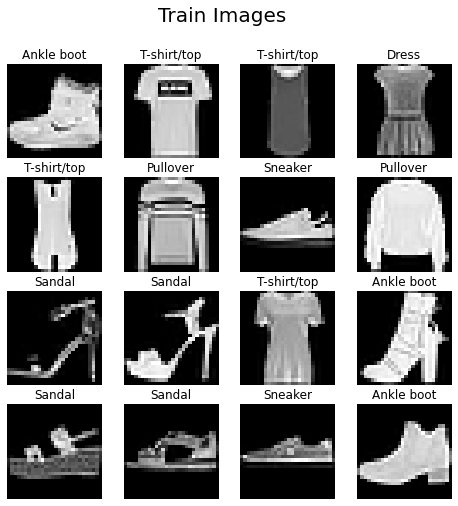

In [7]:
# train 이미지 확인
plt.figure(figsize=(8, 8))
for i in range(16):
    plt.subplot(4, 4, i+1)                    # plt.subplot(row, column, index)
    plt.suptitle('Train Images', fontsize=20) # 하나의 큰 제목 설정
    plt.title(item[y_train[i]])               # 각 이미지마다 제목 설정
    plt.imshow(x_train[i], cmap=plt.cm.gray)
    plt.axis("off")

plt.show()

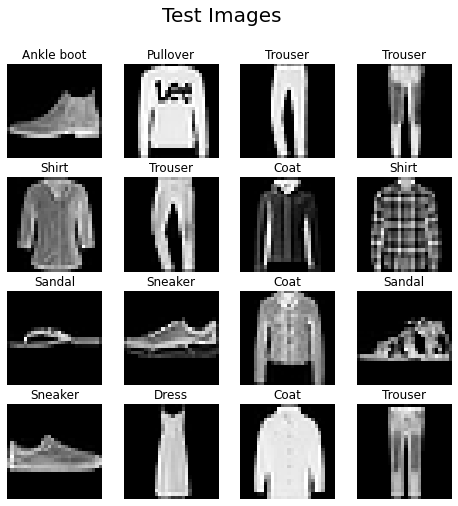

In [8]:
# Test 이미지 확인

plt.figure(figsize=(8, 8))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.suptitle('Test Images', fontsize=20)
    plt.title(item[y_test[i]])
    plt.imshow(x_test[i], cmap=plt.cm.gray)
    plt.axis("off")

plt.show()

## 2. 전처리
### 2.1 이미지 데이터 전처리

In [9]:
x_train = x_train.astype('float32')      # data type을 float32로 변경
x_train = x_train/255                    # normalization 진행

x_test = x_test.astype('float32')
x_test = x_test/255

### 2.2 레이블 데이터 전처리

In [10]:
y_onehot_train = to_categorical(y_train, num_classes=10) # one-hot encoding을 하여 10개의 레이블이 0, 1로 표현되도록 변경
y_onehot_test = to_categorical(y_test, num_classes=10)

In [11]:
# 전처리 결과
for i in [x_train, y_onehot_train, x_test, y_onehot_test]:
    print(i.shape)

(60000, 28, 28)
(60000, 10)
(10000, 28, 28)
(10000, 10)


## 3. keras를 활용한 모델 생성
### 3.1 신경망 모델에 들어가는 hyper parameter 설정

In [12]:
OUTPUT_SHAPE = 10         # 출력 데이터가 나오는 포멧 설정
BATCH_SIZE = 128          # 한 번에 처리할 데이터량 설정
EPOCHS = 10               # 신경망을 학습할 횟수
VERBOSE = 1               # 학습 진행 상황 출력 모드 설정 

### 3.2 신경망 모델 생성

In [13]:
model = Sequential([
  Flatten(),
  Dense(128, activation='relu'),
  Dense(64, activation='relu'),
  Dense(10, activation='softmax')
])

### 3.3 신경망 모델 컴파일

In [14]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

## 4. 신경망 모델 학습

In [15]:
history = model.fit(
    x_train, y_onehot_train,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=VERBOSE,
    validation_split=0.3 
)

Epoch 1/10
329/329 [==============================] - 4s 6ms/step - loss: 0.5928 - accuracy: 0.7957 - val_loss: 0.4348 - val_accuracy: 0.8464
Epoch 2/10
329/329 [==============================] - 1s 4ms/step - loss: 0.4098 - accuracy: 0.8545 - val_loss: 0.3948 - val_accuracy: 0.8591
Epoch 3/10
329/329 [==============================] - 2s 5ms/step - loss: 0.3649 - accuracy: 0.8687 - val_loss: 0.3802 - val_accuracy: 0.8632
Epoch 4/10
329/329 [==============================] - 1s 4ms/step - loss: 0.3363 - accuracy: 0.8777 - val_loss: 0.3615 - val_accuracy: 0.8708
Epoch 5/10
329/329 [==============================] - 1s 4ms/step - loss: 0.3156 - accuracy: 0.8854 - val_loss: 0.3543 - val_accuracy: 0.8723
Epoch 6/10
329/329 [==============================] - 1s 4ms/step - loss: 0.3021 - accuracy: 0.8882 - val_loss: 0.3610 - val_accuracy: 0.8711
Epoch 7/10
329/329 [==============================] - 2s 5ms/step - loss: 0.2898 - accuracy: 0.8941 - val_loss: 0.3425 - val_accuracy: 0.8753
Epoch 

## 5. 결과 확인

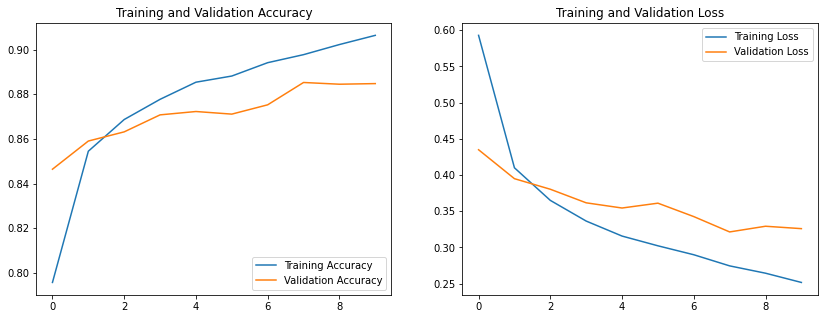

In [16]:
# accuracy, loss 그래프

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()

## 6. 신경망 모델 평가
### 6.1 테스트 데이터를 이용한 평가

In [17]:
model.evaluate(x_test, y_onehot_test)    # loss와 accuracy 반환

313/313 [==============================] - 1s 3ms/step - loss: 0.3559 - accuracy: 0.8784


[0.3559190034866333, 0.8784000277519226]

### 6.2 모델 예측

In [18]:
y_pred_enc = model.predict(x_test)          # one-hot encoding된 label 예측값
y_pred = [np.argmax(i) for i in y_pred_enc] # label 예측값

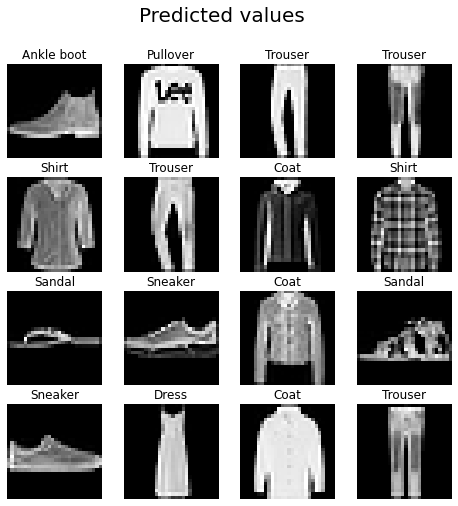

In [19]:
fig, ax = plt.subplots(figsize=(8, 8))
for idx, row in enumerate(x_test[:16]):
    plt.subplot(4, 4, idx+1)
    plt.title(item[y_pred[idx]])
    img = row.reshape(28, 28)
    fig.suptitle("Predicted values", fontsize=20)
    plt.axis('off')
    plt.imshow(img, cmap=plt.cm.gray)

### 6.3 혼동 행렬(confusion_matrix)

In [20]:
matrix = confusion_matrix(y_test, y_pred)
df = pd.DataFrame(matrix)
df.columns = item.values()
df.index = item.values()
        
df

,T-shirt/top,Trouser,Pullover,Dress,Coat,Sandal,Shirt,Sneaker,Bag,Ankle boot
T-shirt/top,802,4,27,11,6,0,138,0,12,0
Trouser,0,976,0,17,3,0,3,0,1,0
Pullover,7,0,746,8,151,0,86,0,2,0
Dress,29,21,15,849,47,0,35,0,4,0
Coat,0,1,64,21,860,0,50,0,4,0
Sandal,0,0,0,0,0,951,0,32,1,16
Shirt,92,3,69,26,79,0,720,0,11,0
Sneaker,0,0,0,0,0,13,0,972,1,14
Bag,3,0,4,3,6,1,7,4,972,0
Ankle boot,0,0,0,0,0,8,1,55,0,936
